<a href="https://colab.research.google.com/github/iman-ezatfar/Maternal-Health-Risk/blob/main/Maternal_Health_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "Healthcare Workforce Mental Health Dataset.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rivalytics/healthcare-workforce-mental-health-dataset",
  file_path,
)

df.head()

/tmp/ipython-input-110-2738933313.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,Employee ID,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,HCP-00001,Pediatric Nurse,Pediatrics,Heavy Workload,8,Often,2,Yes,6,No
1,HCP-00002,Laboratory Technician,Laboratory,Safety Concerns,8,Often,1,Yes,12,No
2,HCP-00003,Nursing Assistant,Assisted Living,Poor Work Environment,6,Occasionally,2,Yes,9,Yes
3,HCP-00004,Medical Assistant,Outpatient Services,Poor Work Environment,7,Never,4,No,11,No
4,HCP-00005,Registered Nurse,General Medicine,Work-Life Imbalance,8,Occasionally,2,Yes,7,No


Job Satisfaction – 1-5 scale rating job satisfaction:
○ 1 = Very Dissatisfied
○ 5 = Very Satisfied
8. Access to EAPs – Whether the employee has access to Employee Assistance
Programs (Yes/No).
9. Mental Health Absences – Number of mental health-related leave days taken.
10. Turnover Intention – Whether the employee is considering leaving their role
(Yes/No)

In [111]:
df.isna().sum()

,0
Employee ID,0
Employee Type,0
Department,0
Workplace Factor,0
Stress Level,0
Burnout Frequency,0
Job Satisfaction,0
Access to EAPs,0
Mental Health Absences,0
Turnover Intention,0


#1-Key Data Relationships & Trends

In [112]:
df.columns

Index(['Employee ID', 'Employee Type', 'Department', 'Workplace Factor',
       'Stress Level', 'Burnout Frequency', 'Job Satisfaction',
       'Access to EAPs', 'Mental Health Absences', 'Turnover Intention'],
      dtype='object')

##1.1-Employee Type → Workplace Factor

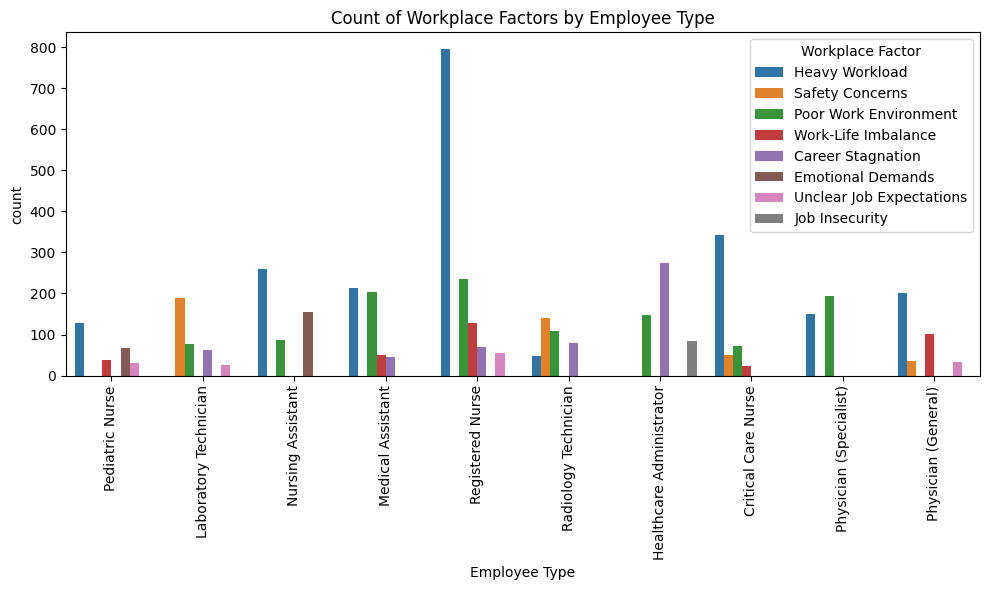

In [113]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Employee Type', hue='Workplace Factor')
plt.title('Count of Workplace Factors by Employee Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Results : Registered Nurses report Heavy Workload, while Healthcare
Administrators report Career Stagnation

##1.2-Workplace Factor → Stress Level:

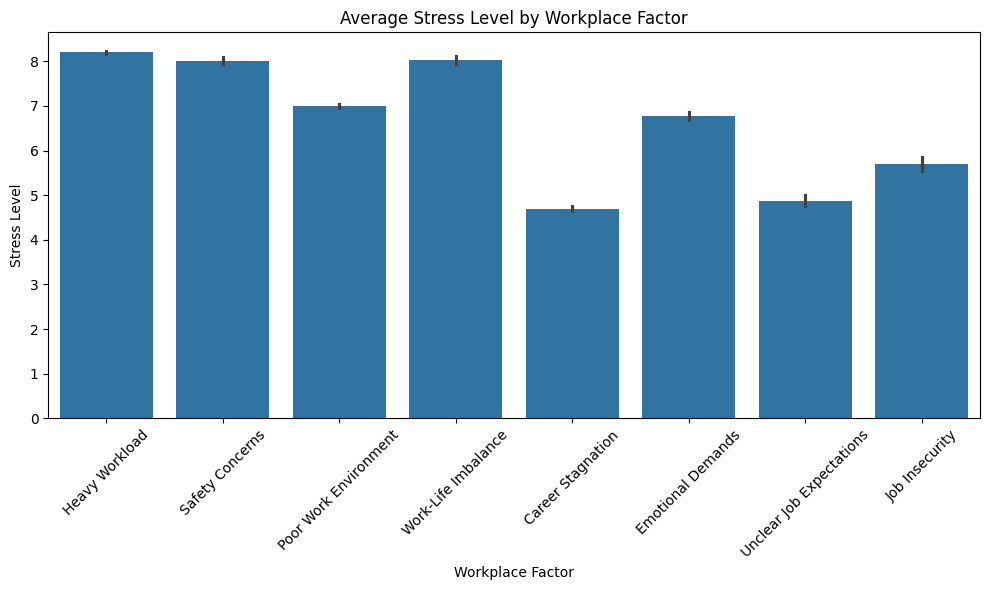

In [114]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x = 'Workplace Factor', y = 'Stress Level')
plt.title('Average Stress Level by Workplace Factor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Result: Heavy Workload is associated with higher stress levels

##1.3-Stress Level → Burnout Frequency

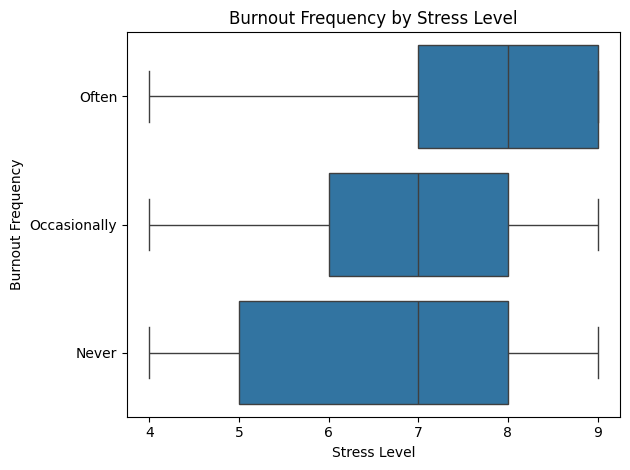

In [115]:
sns.boxplot(data=df, x='Stress Level', y='Burnout Frequency')
plt.title('Burnout Frequency by Stress Level')
plt.tight_layout()
plt.show()

Results: Employees with a stress level of 8-10 are more likely to experience frequent burnout

##1.4-Burnout Frequency → Job Satisfaction

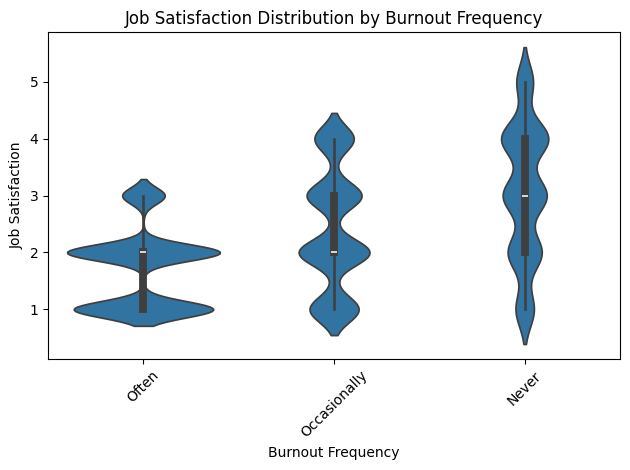

In [116]:
sns.violinplot(data=df, x='Burnout Frequency', y='Job Satisfaction')
plt.title('Job Satisfaction Distribution by Burnout Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Result: : Employees who frequently experience burnout report lower job satisfaction

##1.5-Job Satisfaction + Stress Level → Turnover Intention

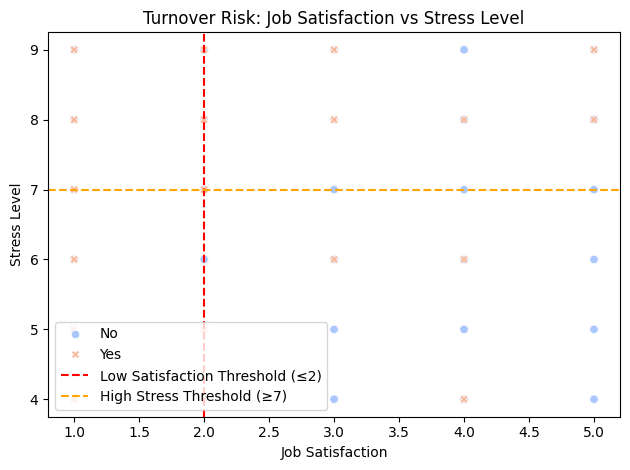

In [117]:
sns.scatterplot(
    data=df,
    x='Job Satisfaction',
    y='Stress Level',
    hue='Turnover Intention',
    style='Turnover Intention',
    palette='coolwarm'
)
plt.axvline(x=2, color='red', linestyle='--', label='Low Satisfaction Threshold (≤2)')
plt.axhline(y=7, color='orange', linestyle='--', label='High Stress Threshold (≥7)')
plt.title('Turnover Risk: Job Satisfaction vs Stress Level')
plt.legend()
plt.tight_layout()
plt.show()


Result: : Employees with Job Satisfaction ≤ 2 and Stress Level ≥ 7 are high
turnover risks.


##1.6-Access to EAPs → Mental Health Absences

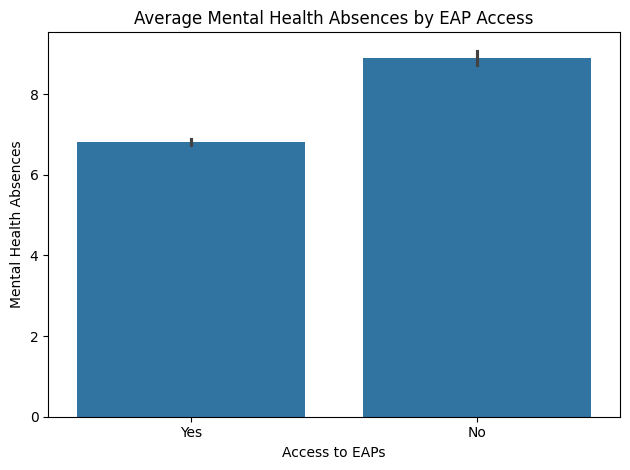

In [118]:
sns.barplot(data=df, x='Access to EAPs', y='Mental Health Absences')
plt.title('Average Mental Health Absences by EAP Access')
plt.tight_layout()
plt.show()

Result: Those without access to EAPs tend to have higher absence rates due to stress

# 2-Variable Encoding

In [119]:
df['Turnover Intention'].value_counts()

,count
Turnover Intention,
Yes,3335
No,1665


Mapping Target column 1=Yes, 2=No

In [120]:
df['Turnover Intention'] = df['Turnover Intention'].map({'Yes': 1, 'No': 0})

In [121]:
df.head()

,Employee ID,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,HCP-00001,Pediatric Nurse,Pediatrics,Heavy Workload,8,Often,2,Yes,6,0
1,HCP-00002,Laboratory Technician,Laboratory,Safety Concerns,8,Often,1,Yes,12,0
2,HCP-00003,Nursing Assistant,Assisted Living,Poor Work Environment,6,Occasionally,2,Yes,9,1
3,HCP-00004,Medical Assistant,Outpatient Services,Poor Work Environment,7,Never,4,No,11,0
4,HCP-00005,Registered Nurse,General Medicine,Work-Life Imbalance,8,Occasionally,2,Yes,7,0


In [127]:
df['Employee ID'].value_counts()

,count
Employee ID,
HCP-05000,1
HCP-00001,1
HCP-00002,1
HCP-00003,1
HCP-00004,1
...,...
HCP-00013,1
HCP-00012,1
HCP-00011,1


In [122]:
cat_cols = ['Employee Type', 'Department', 'Workplace Factor', 'Burnout Frequency', 'Access to EAPs']
df_dummies = pd.get_dummies(df[cat_cols], drop_first=True)
df_dummies = df_dummies.astype(int)
df = pd.concat([df.drop(columns=cat_cols), df_dummies], axis=1)
df.head()

,Employee ID,Stress Level,Job Satisfaction,Mental Health Absences,Turnover Intention,Employee Type_Healthcare Administrator,Employee Type_Laboratory Technician,Employee Type_Medical Assistant,Employee Type_Nursing Assistant,Employee Type_Pediatric Nurse,...,Workplace Factor_Emotional Demands,Workplace Factor_Heavy Workload,Workplace Factor_Job Insecurity,Workplace Factor_Poor Work Environment,Workplace Factor_Safety Concerns,Workplace Factor_Unclear Job Expectations,Workplace Factor_Work-Life Imbalance,Burnout Frequency_Occasionally,Burnout Frequency_Often,Access to EAPs_Yes
0,HCP-00001,8,2,6,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1
1,HCP-00002,8,1,12,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1
2,HCP-00003,6,2,9,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,HCP-00004,7,4,11,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,HCP-00005,8,2,7,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1


#3-Modeling

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(columns = ['Employee ID','Turnover Intention'], axis=1)
y = df['Turnover Intention']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##3.1-Random Forest

In [131]:
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

In [152]:
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.82      0.87       319
           1       0.92      0.96      0.94       681

    accuracy                           0.92      1000
   macro avg       0.92      0.89      0.90      1000
weighted avg       0.92      0.92      0.92      1000



##3.2-XGBoost

In [133]:
xgb= XGBClassifier()
xgb.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [151]:
y_pred_xgb = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.83      0.60      0.70       319
           1       0.83      0.94      0.89       681

    accuracy                           0.83      1000
   macro avg       0.83      0.77      0.79      1000
weighted avg       0.83      0.83      0.83      1000



##3.3-KNN

In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [144]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [150]:
y_pred_knn = knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.54      0.45      0.49       319
           1       0.76      0.82      0.79       681

    accuracy                           0.70      1000
   macro avg       0.65      0.63      0.64      1000
weighted avg       0.69      0.70      0.69      1000



Random Forest gives the best prediction on whether the employee will Intent to Turn Over or not with 92% Accuracy